# Goal:Hotel Cancellation Predition

In [196]:
# DataSet Source- https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Importing necessary Libraries

In [197]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [198]:
sns.set(rc={'figure.figsize':(10,5)})

# Loading Dataset

In [199]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,Jul-15,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,Jul-15,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,Jul-15,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [200]:
# Inspecting datatypes of coloumns

In [201]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [202]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,26,NaN,12,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,May-17,NaN,August,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21-10-2015
freq,79330,NaN,NaN,6313,NaN,13877,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,NaN,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,NaN,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,NaN,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,NaN,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,NaN,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,NaN,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [204]:
df.dtypes.value_counts()

int64      16
object     13
float64     4
dtype: int64

In [205]:
# We find 16 integer  coloumns,13 object datatype coloumns,4 float coloumns

In [206]:
# The dataset has 33 coloumns and 119390 rows.20 numerical coloumns 13 categorical.

In [207]:
# dataframe shape
df.shape

(119390, 33)

In [208]:
# Check linear Correlation
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<AxesSubplot:>

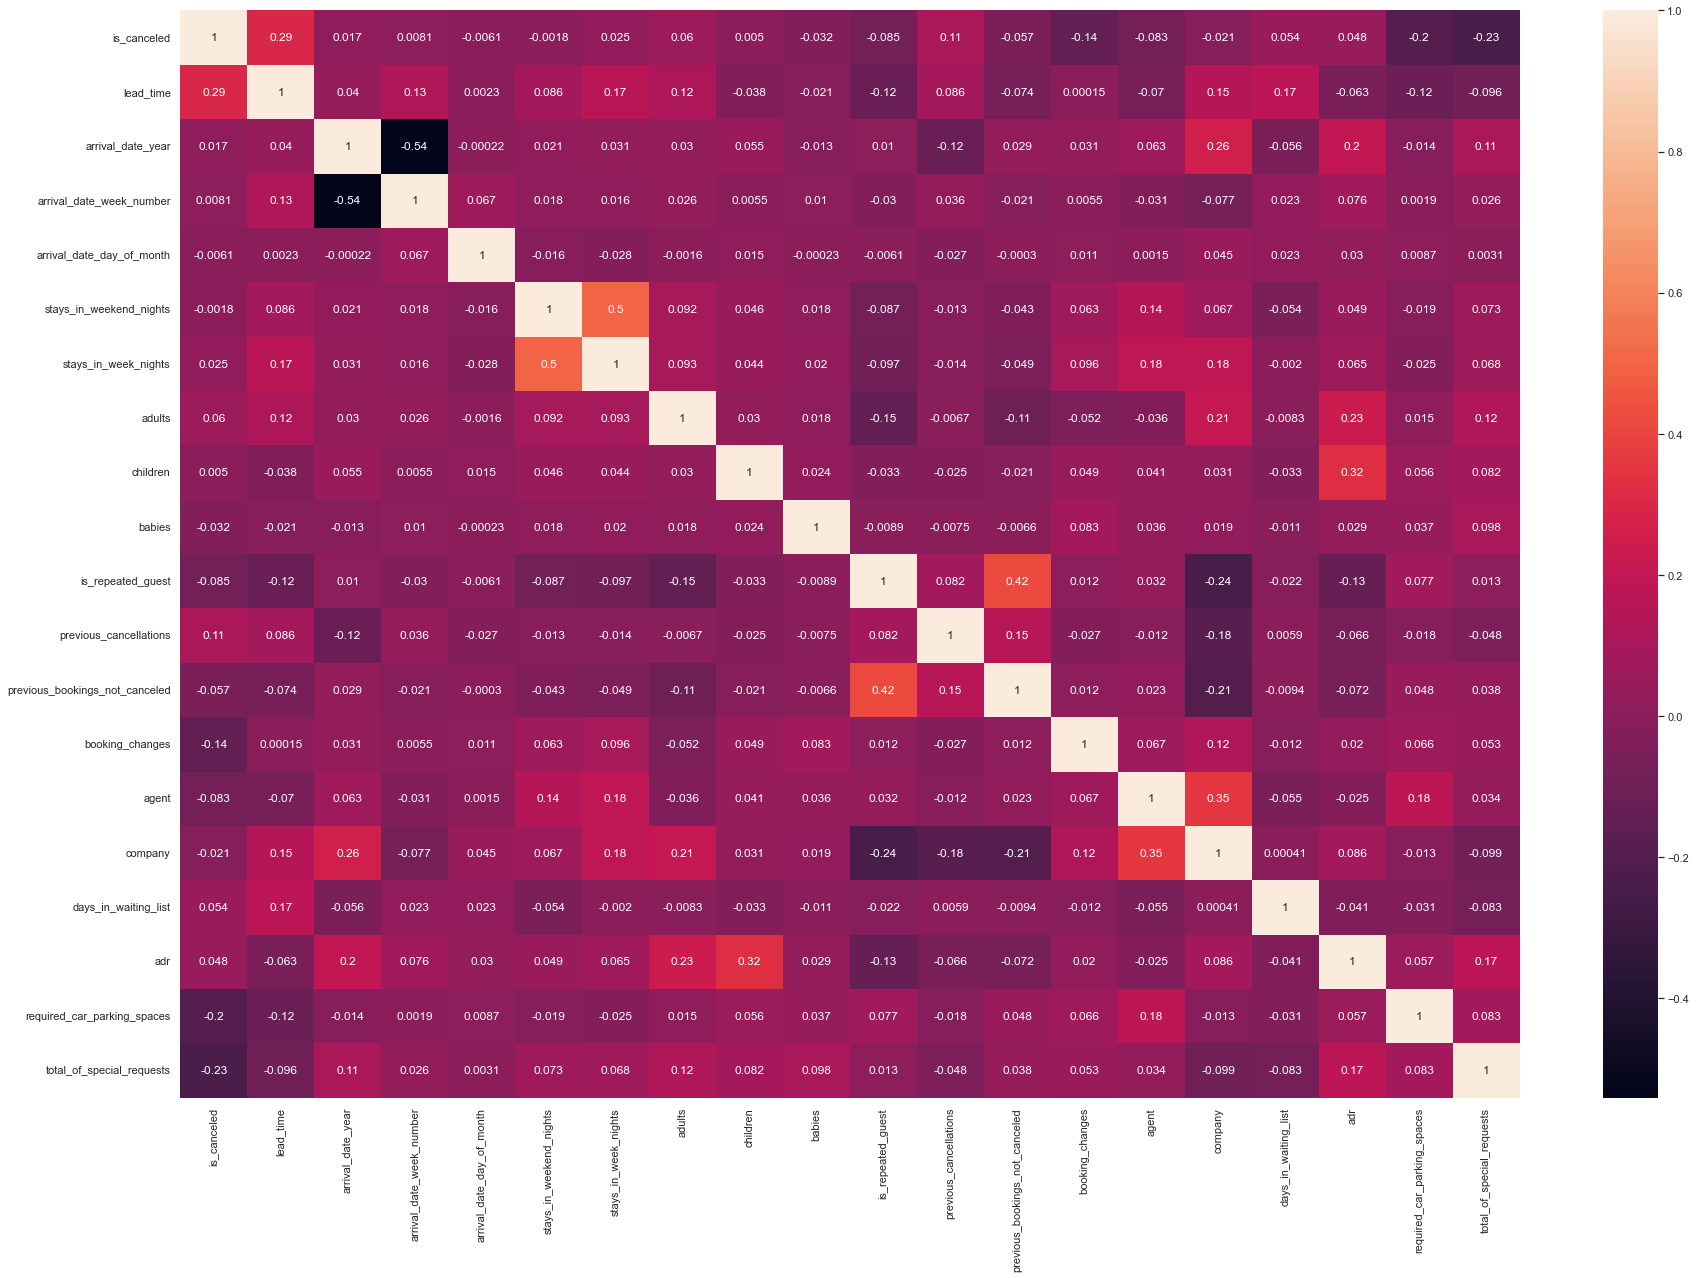

In [209]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True)

In [210]:
df.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

# Duplicate Value Check

In [211]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')

Boolean series:
0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool




In [212]:
# Count of duplicate values
bool_series.sum()

31994

In [213]:
df[bool_series]

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,Jul-15,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
22,Resort Hotel,0,72,Jul-15,2015,July,27,1,2,4,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,Jul-15,2015,July,27,2,2,3,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,Jul-15,2015,July,28,5,1,0,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,01-07-2015
200,Resort Hotel,0,0,Jul-15,2015,July,28,7,0,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,08-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,Aug-17,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,03-09-2017
119352,City Hotel,0,63,Aug-17,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017
119353,City Hotel,0,63,Aug-17,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017
119354,City Hotel,0,63,Aug-17,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017


In [214]:
# We clearly see for example index 11952 and 11953 are repeated
# We need to remove duplicate records

In [215]:
print('DataFrame after keeping only the first instance of the duplicate rows:')
# The `~` sign is used for negation. It changes the boolean value True to False and False to True.
df=df[~bool_series]
df

DataFrame after keeping only the first instance of the duplicate rows:


,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,Jul-15,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,Jul-15,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,Jul-15,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,Jul-15,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,Aug-17,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,Aug-17,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,Aug-17,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,Aug-17,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [216]:
# Some inspection about the data distribution

In [217]:
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [218]:
# Here in is_cancelled coloumn 1 is cancelled 0 is not cancelled

In [219]:
# Create target coloumn from is cancelled coloumn

In [220]:
df['target']=np.where(df['is_canceled'].isin([1]),1,0) 

In [221]:
df['target'].value_counts()

0    63371
1    24025
Name: target, dtype: int64

In [222]:
df['target'].mean()

0.27489816467572886

In [223]:
# We find theres is class imbalance

In [224]:
# Lets visualise this target coloumn

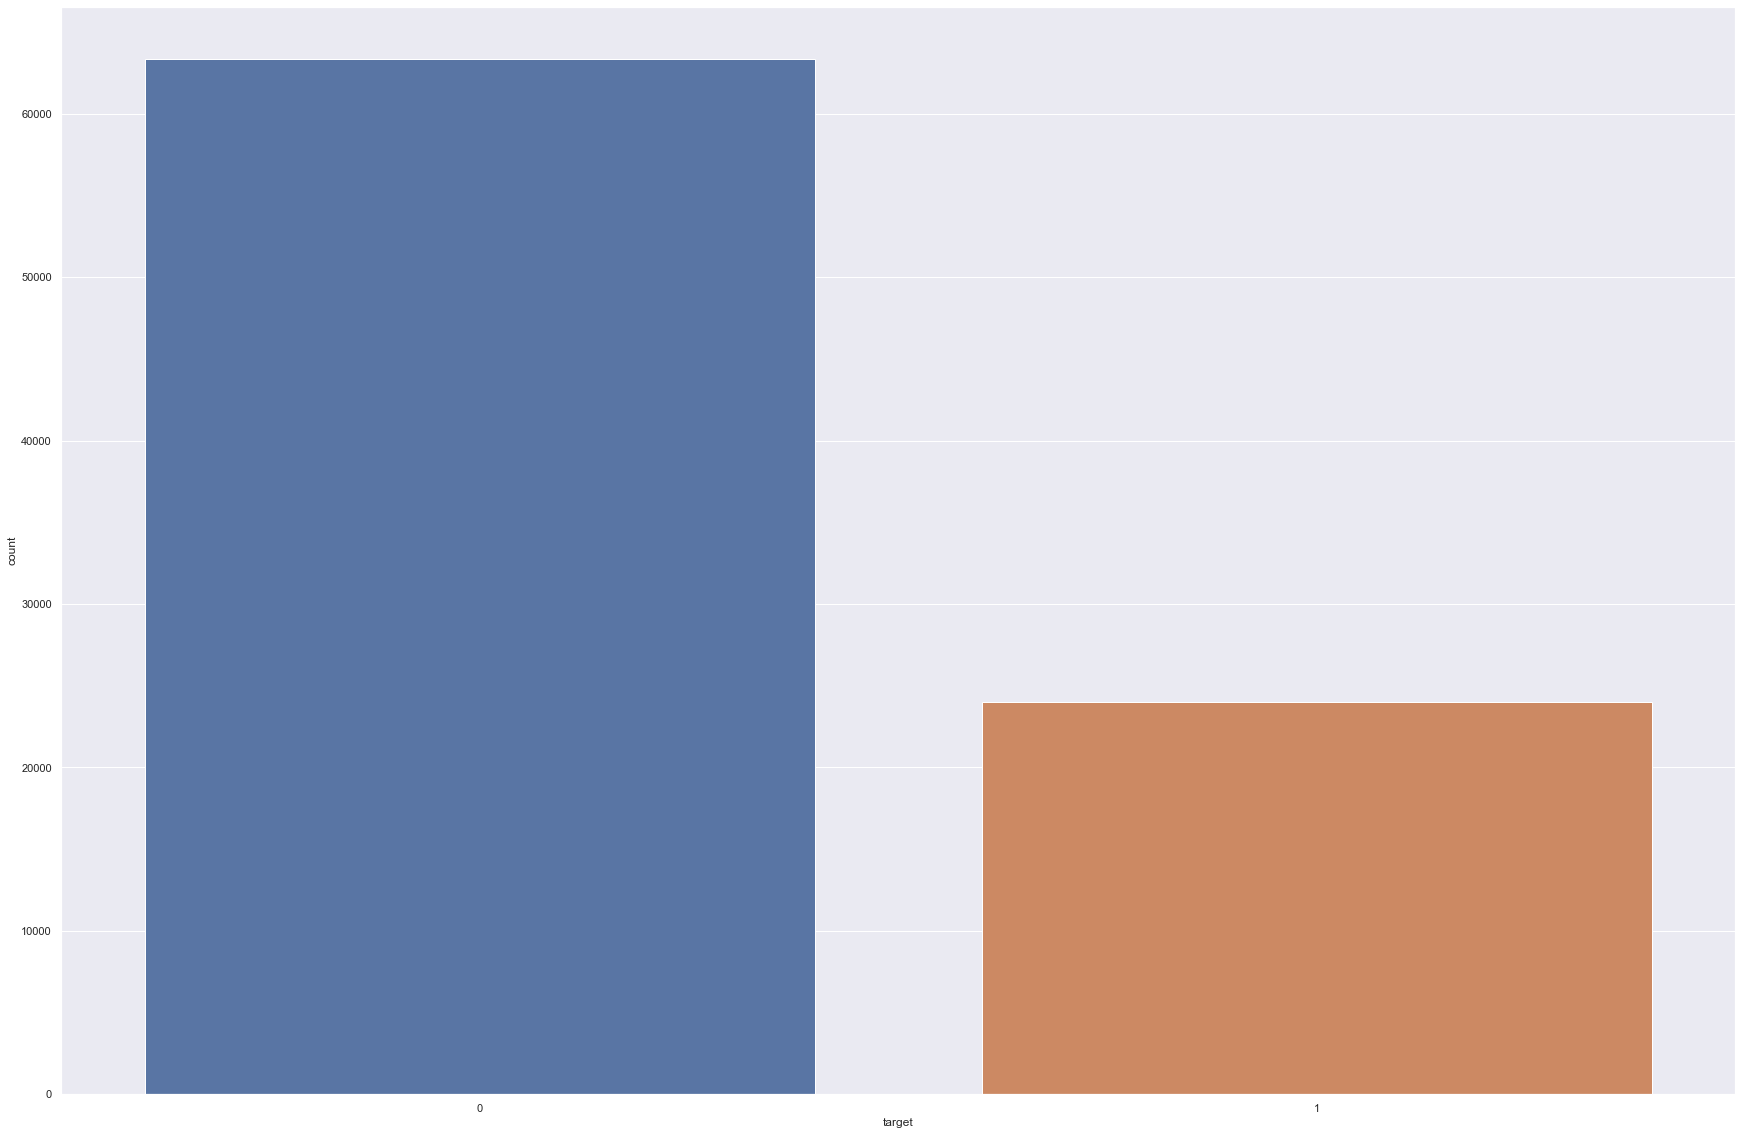

In [225]:
sns.countplot(x='target',data=df)
plt.show()

# Missing Value Analysis

In [226]:
# check for missing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_month_year                    0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193


In [227]:
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
previous_cancellations                0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0


In [228]:
# We find company,agent,country and children has missing values

In [229]:
# Delving into nature of the data coloumns we find out that 
# For company if no data is given then it is private booking else it is booked by his company-So lets substitute the null values by 0
# If agent is missing then most likely made by the person himself without help from any travel agent
# For country if value missing then it is most liekly unknown
# If children data is missing then most likely the person deosn't have children


In [230]:
# Lets make a dictionary of such replacements to be done
nadict = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}

In [231]:
# fill null in dataframe
df = df.fillna(nadict)

# "meal" contains values "Undefined", which is same as SC category.So we replace undefined by sc
df["meal"].replace("Undefined", "SC", inplace=True)

In [232]:
df.isnull().any().sum()

0

In [233]:
# Some points to note
# agent-The id of agent that did reservation is of no importanceto us
# comany-The id of company that did reservation is of no importanceto us
# reservation_status_date - We have other features (like: arrival_date_week_number, arrival_date_day_of_month etc) that gives us the same information

# Outlier Check

In [234]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,target
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,0.274898
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,0.446466
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,2015.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.830000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,1.000000


In [235]:
newdf = df.select_dtypes(include=np.number)

In [236]:
chardf=df.select_dtypes(include=object )

In [237]:
chardf

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,Jul-15,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,Jul-15,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,Jul-15,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,Jul-15,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,Jul-15,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Aug-17,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,06-09-2017
119386,City Hotel,Aug-17,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,07-09-2017
119387,City Hotel,Aug-17,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,07-09-2017
119388,City Hotel,Aug-17,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,07-09-2017


In [238]:
newdf

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,target
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,3,0.0,0.0,0,0.00,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,4,0.0,0.0,0,0.00,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,0.0,0.0,0,75.00,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,304.0,0.0,0,75.00,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,240.0,0.0,0,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,394.0,0.0,0,96.14,0,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,0,9.0,0.0,0,225.43,0,2,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,0,9.0,0.0,0,157.71,0,4,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,89.0,0.0,0,104.40,0,0,0


In [239]:
def outlier_cap(data):
  data=data.clip(lower=data.quantile(0.01))
  data=data.clip(upper=data.quantile(0.99))
  return data

In [240]:
newdf = newdf.apply(lambda data : outlier_cap(data))

In [241]:
newdf.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,target
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.0,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.290093,2016.210296,26.848197,15.815541,0.995824,2.600863,1.875544,0.137684,0.010458,...,0.019280,0.104890,0.256236,80.147043,10.170134,0.0,105.954533,0.083677,0.694082,0.274898
std,0.446466,83.727432,0.686102,13.656280,8.835146,0.982596,1.892669,0.496516,0.450213,0.101729,...,0.137508,0.610448,0.610976,107.302185,47.803500,0.0,50.844810,0.276904,0.816186,0.446466
min,0.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,2015.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,36.830000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,48.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.0,72.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.0,98.100000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,234.000000,0.000000,0.0,134.000000,0.000000,1.000000,1.000000


# Multicollinearity Check

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [243]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = newdf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                          for i in range(len(newdf.columns))]

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [244]:
vif_data

,feature,VIF
0,is_canceled,inf
1,lead_time,2.340230
2,arrival_date_year,26.066007
3,arrival_date_week_number,5.051450
4,arrival_date_day_of_month,4.248429
5,stays_in_weekend_nights,2.761178
6,stays_in_week_nights,4.235166
7,adults,19.188419
8,children,1.251516
9,babies,1.034508


In [245]:
# We find arrival date year and adults have very high VIF much above 10.So we decide to remove them.

In [246]:
newdf=newdf.drop('arrival_date_year',axis=1)

In [247]:
newdf=newdf.drop('adults',axis=1)

In [248]:
df=pd.concat([newdf,chardf],axis=1, join='inner')

# Exploratory Data Analysis

In [249]:
df['meal'].value_counts()

BB    67978
SC     9973
HB     9085
FB      360
Name: meal, dtype: int64

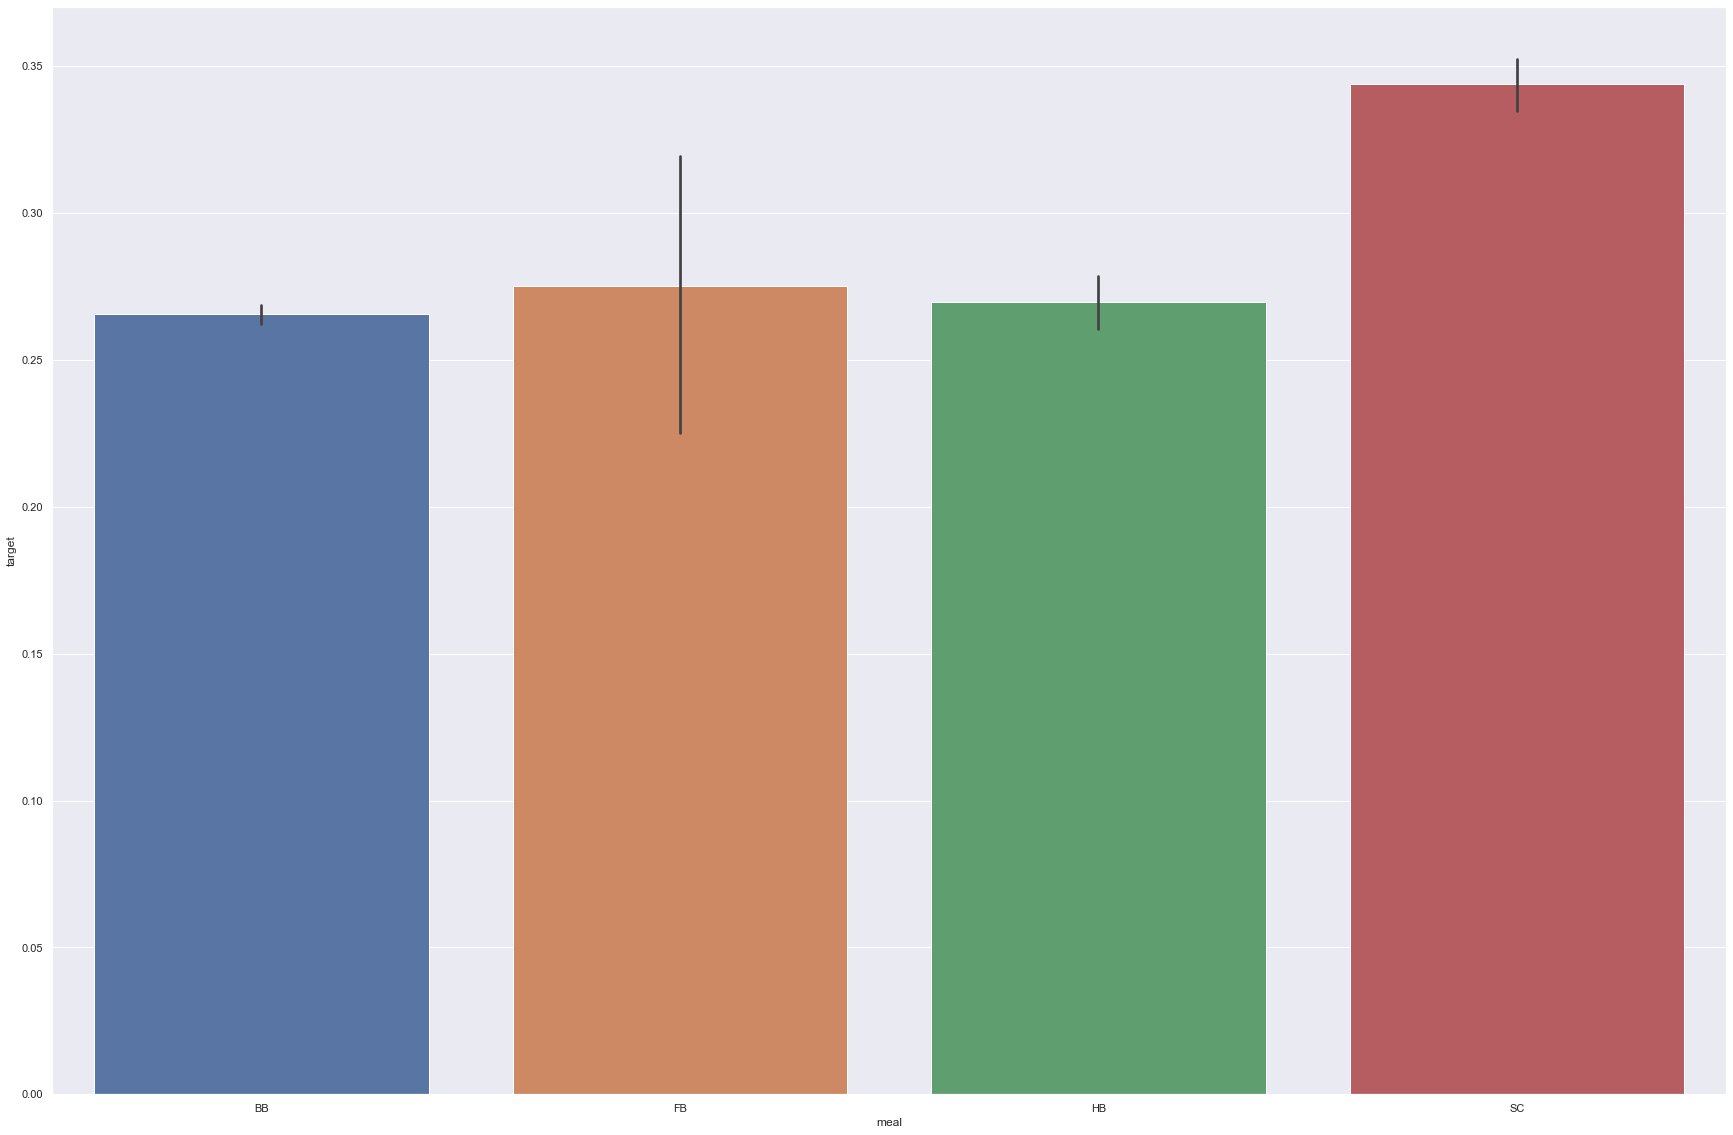

In [250]:
from numpy import mean
ax = sns.barplot(x="meal", y="target", data=df, estimator=mean)

In [251]:
# From dataset description we find that
# BB – Bed &Breakfast;
# HB – Half board(breakfastandone
# other meal – usually dinner);
# FB – Full board(breakfast,lunchand
# dinner)

In [252]:
# So FB has highest cancellation rates

In [253]:
# Lets find which coutries have highest cacellation rates

In [254]:
df.groupby('country')['target'].mean()

country
ABW    0.000000
AGO    0.564327
AIA    0.000000
ALB    0.181818
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.371795
ZMB    0.500000
ZWE    0.500000
Name: target, Length: 178, dtype: float64

In [255]:
# Highest cancellation countries
df.groupby('country')['target'].mean().sort_values(ascending=False).head(15)

country
MYT    1.000000
VGB    1.000000
JEY    1.000000
KHM    1.000000
BEN    1.000000
GLP    1.000000
UMI    1.000000
HND    1.000000
IMN    1.000000
NIC    1.000000
GGY    1.000000
FJI    1.000000
HKG    0.913043
MAC    0.900000
ARE    0.854167
Name: target, dtype: float64

In [256]:
sns.set(rc={'figure.figsize':(10,5)})

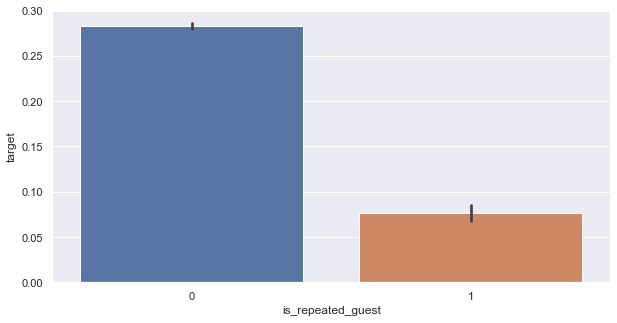

In [257]:
# Repeated Guest
ax = sns.barplot(x="is_repeated_guest", y="target", data=df, estimator=mean)

In [258]:
# We observe that repeated guest have much lower cancellation rates

In [259]:
# Market Segment Bookings

In [260]:
df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

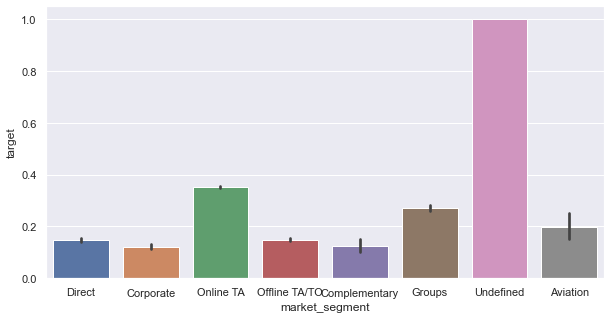

In [261]:
ax = sns.barplot(x="market_segment", y="target", data=df, estimator=mean)

In [262]:
df.groupby('market_segment')['target'].mean()

market_segment
Aviation         0.198238
Complementary    0.125356
Corporate        0.121083
Direct           0.147154
Groups           0.270134
Offline TA/TO    0.148535
Online TA        0.353462
Undefined        1.000000
Name: target, dtype: float64

In [263]:
# Ignoring undefined category snce it has only 2 datapoints we find that Groups and online TA market segment has highest cancellation rates

In [264]:
# Inspection of month of arrival

In [265]:
df['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

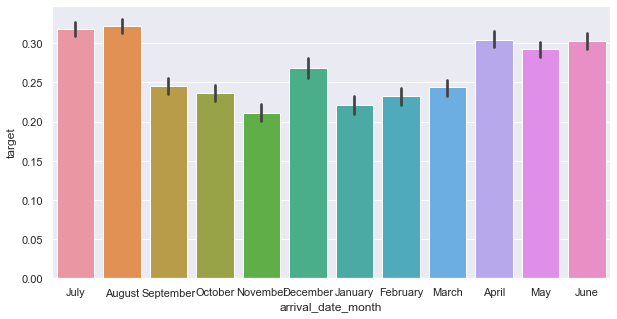

In [266]:
ax = sns.barplot(x="arrival_date_month", y="target", data=df, estimator=mean)

In [267]:
df.groupby('arrival_date_month')['target'].mean()

arrival_date_month
April        0.304628
August       0.321844
December     0.268564
February     0.232043
January      0.221180
July         0.317987
June         0.303155
March        0.243578
May          0.292280
November     0.211011
October      0.236804
September    0.245441
Name: target, dtype: float64

In [268]:
# Stays in weekend nights

In [269]:
df['stays_in_weekend_nights'].value_counts()

0.0    35151
2.0    26414
1.0    22657
4.0     2024
3.0     1150
Name: stays_in_weekend_nights, dtype: int64

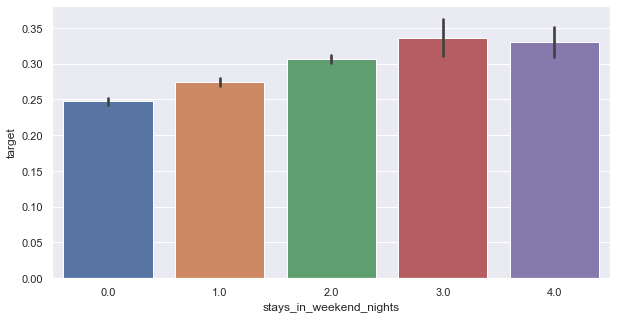

In [270]:
ax = sns.barplot(x="stays_in_weekend_nights", y="target", data=df, estimator=mean)

In [271]:
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0.0    0.247020
1.0    0.274176
2.0    0.305709
3.0    0.335652
4.0    0.330534
Name: target, dtype: float64

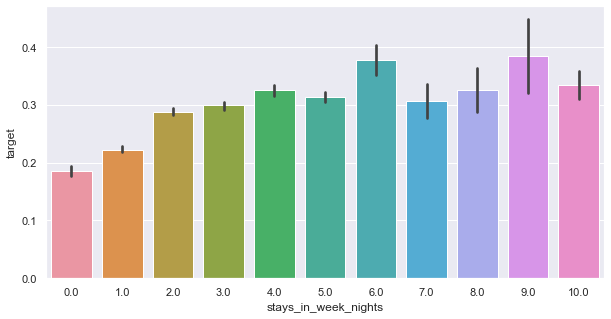

In [272]:
ax = sns.barplot(x="stays_in_week_nights", y="target", data=df, estimator=mean)

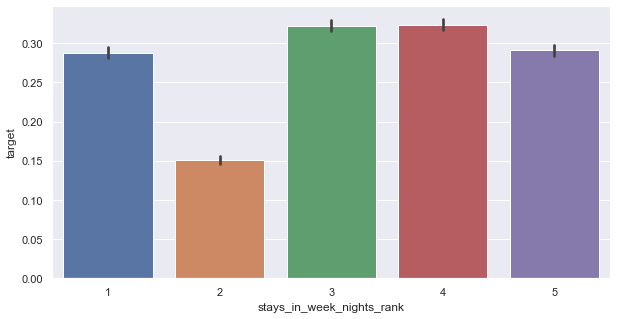

In [273]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="stays_in_week_nights_rank",y="target",data=df,estimator=mean)

In [274]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1    0.0
2    1.0
3    2.0
4    3.0
5    4.0
Name: stays_in_week_nights, dtype: float64

In [275]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
3    0.274898
Name: target, dtype: float64

In [276]:
# Previous cancellations

In [277]:
df['previous_cancellations'].value_counts()

0.0    85711
1.0     1685
Name: previous_cancellations, dtype: int64

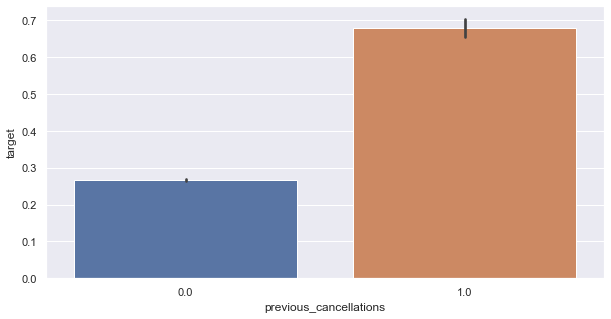

In [278]:
ax = sns.barplot(x="previous_cancellations", y="target", data=df, estimator=mean)

In [279]:
df.groupby('previous_cancellations')['target'].mean()

previous_cancellations
0.0    0.266955
1.0    0.678932
Name: target, dtype: float64

In [280]:
# Making previous Cancellation Indicator variable

In [281]:
df['prev_cancel_ind']=np.where(df['previous_cancellations'].isin([0]),0,1)
df.groupby('prev_cancel_ind')['target'].count()

prev_cancel_ind
0    85711
1     1685
Name: target, dtype: int64

In [282]:
df['prev_cancel_ind'].value_counts()

0    85711
1     1685
Name: prev_cancel_ind, dtype: int64

In [283]:
# Booking Changes Inspecvtion

In [284]:
df.groupby('booking_changes')['target'].mean()

booking_changes
0.0    0.301676
1.0    0.138598
2.0    0.200684
3.0    0.162198
Name: target, dtype: float64

In [285]:
# Distribution Channel Inspection

In [286]:
df["distribution_channel"].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

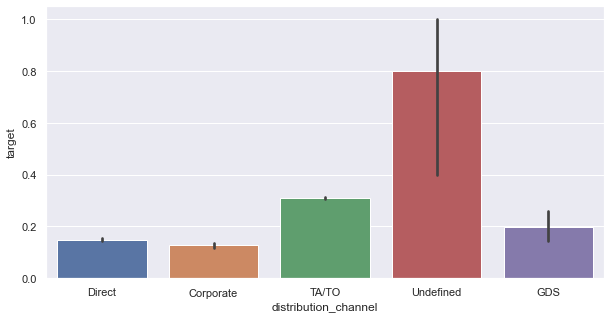

In [287]:
ax = sns.barplot(x="distribution_channel", y="target", data=df, estimator=mean)

In [288]:
# Reserved Room Type

In [289]:
df["reserved_room_type"].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

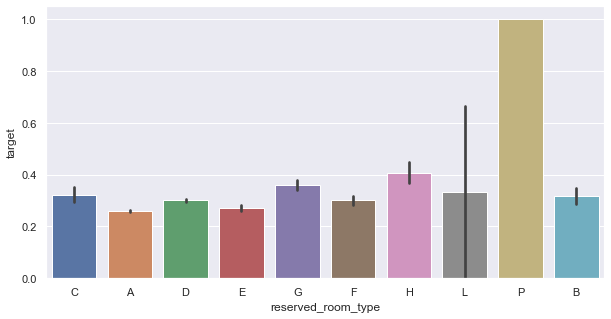

In [290]:
ax = sns.barplot(x="reserved_room_type", y="target", data=df, estimator=mean)

In [291]:
# P Type room has 100 percent cancellation rate.

In [292]:
# Deposit Type Inspection

In [293]:
df.groupby('deposit_type')['target'].count()

deposit_type
No Deposit    86251
Non Refund     1038
Refundable      107
Name: target, dtype: int64

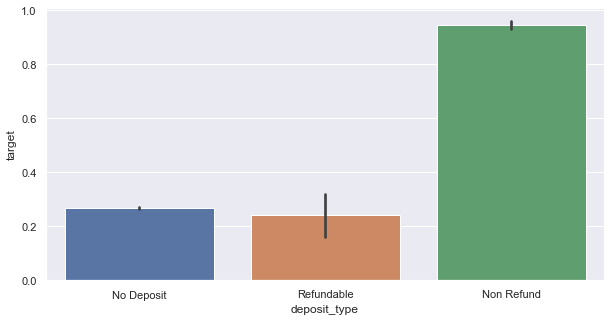

In [294]:
ax = sns.barplot(x="deposit_type", y="target", data=df, estimator=mean)

In [295]:
# Interesting Trend that nonrefundable had such high cancellation rates whereas nodposit and refundable had lower rates

In [296]:
df.groupby('deposit_type')['target'].mean()

deposit_type
No Deposit    0.266849
Non Refund    0.947013
Refundable    0.242991
Name: target, dtype: float64

In [297]:
# Customer Type Inspection

In [298]:
df.groupby('customer_type')['target'].count()

customer_type
Contract            3139
Group                544
Transient          71986
Transient-Party    11727
Name: target, dtype: int64

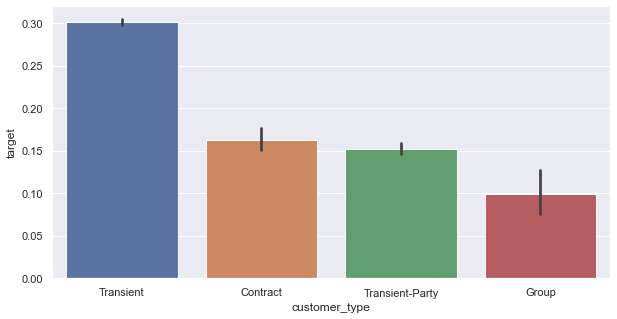

In [299]:
ax = sns.barplot(x="customer_type", y="target", data=df, estimator=mean)

In [300]:
# total_of_special_requests 

In [301]:
df.groupby('total_of_special_requests')['target'].count()

total_of_special_requests
0.0    43894
1.0    29017
2.0    11812
3.0     2673
Name: target, dtype: int64

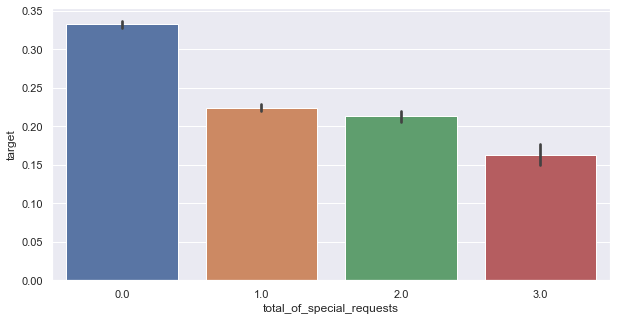

In [302]:
ax = sns.barplot(x="total_of_special_requests", y="target", data=df, estimator=mean)

In [303]:
# Create day_wait_rank

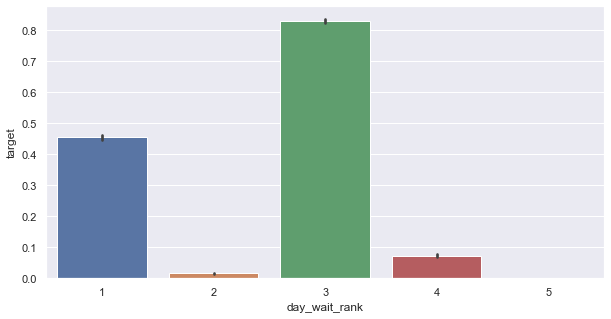

In [304]:
df['day_wait_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
a=sns.barplot(x="day_wait_rank",y="target",data=df,estimator=mean)

In [305]:
# Create indicator variable for day_wait_rank
# df['day_wait_ind']=np.where(df['day_wait_rank'].isin(['3']),1,0)
# df.groupby('day_wait_ind')['target'].count()

In [306]:
# Create indicator variable for day_wait_rank
df['day_wait_ind']=np.where(df['day_wait_rank'].isin([3]),1,0)
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    69917
1    17479
Name: target, dtype: int64

In [307]:
# Average Daily Rate

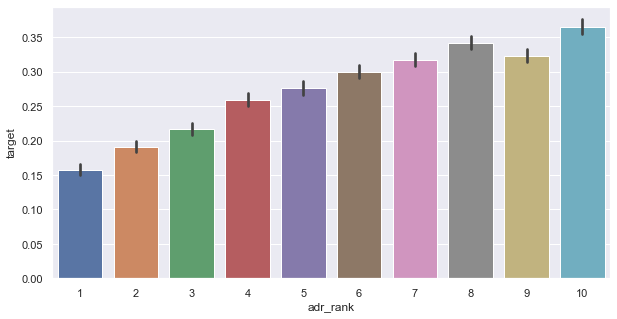

In [308]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="adr_rank",y="target",data=df,estimator=mean)

In [309]:
# Previous Cancellation rank

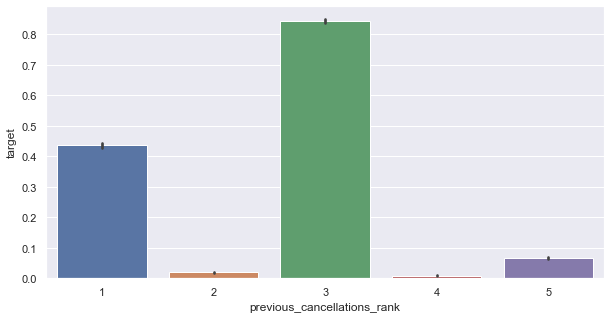

In [310]:
df['previous_cancellations_rank']=pd.qcut(df['previous_cancellations'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="previous_cancellations_rank",y="target",data=df,estimator=mean)

In [311]:
# Lead Time Rank

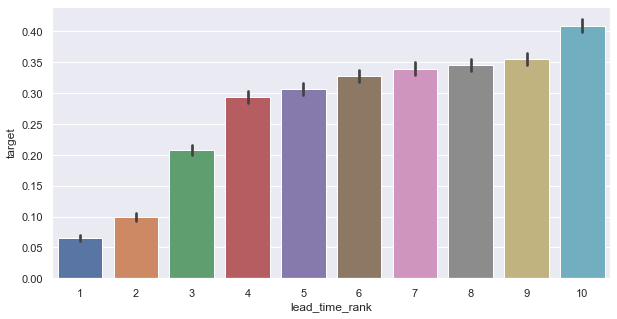

In [312]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="lead_time_rank",y="target",data=df,estimator=mean)

In [313]:
df.groupby('lead_time_rank')['lead_time'].min()

lead_time_rank
1       0.0
2       1.0
3       7.0
4      17.0
5      31.0
6      49.0
7      73.0
8     105.0
9     148.0
10    204.0
Name: lead_time, dtype: float64

In [314]:
# No we choose coloumns based on importance of variables we observed in EDA period.We will try to get results with it.If we dont get then that means 
# we have missed out on some important information and we will try to add some more variables to check and see.
dep=['target']
col_num= ['lead_time','adr']   
         
col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment',
          'prev_cancel_ind','stay_in_week_night_grp']

In [315]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [316]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [317]:
X_var=X_all
Y_var=df['target']

In [318]:
X_all.shape

(87396, 29)

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

In [320]:
# Logistic regression
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [321]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [322]:
# Random Forest
rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 15)
rf_1000.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=1000,
                       random_state=2)

In [323]:
# Gradient Boosting Machine
gbm=GradientBoostingClassifier(random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [324]:
# Logistic Regression model Performance Evaluation

In [325]:
# Logistic Regression model Evaluation metrics
y_predlogreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predlogreg))
print("Precision",metrics.precision_score(y_test,y_predlogreg))
print("Recall",metrics.recall_score(y_test,y_predlogreg))
print("f1_score",metrics.f1_score(y_test,y_predlogreg))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predlogreg))

Accuracy: 0.8716960982493611
Precision 0.8444366320970293
Recall 0.6596182891665523
f1_score 0.7406722170829478
cohen_kappa_score 0.6571359341660312


In [326]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predlogreg)
print(confusion_matrix)

[[18051   885]
 [ 2479  4804]]


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


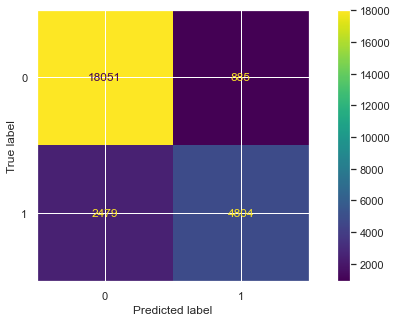

In [327]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [328]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predlogreg))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18936
           1       0.84      0.66      0.74      7283

    accuracy                           0.87     26219
   macro avg       0.86      0.81      0.83     26219
weighted avg       0.87      0.87      0.87     26219



In [329]:
# # Decision Tree  Performance Evaluation

In [330]:
# Decision Tree model Evaluation metrics
y_pred_tree=dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_tree))

Accuracy: 0.88287120027461
Precision 0.8780969479353681
Recall 0.6715639159686942
f1_score 0.7610674550688555
cohen_kappa_score 0.685302547676165


In [331]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[18257   679]
 [ 2392  4891]]


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


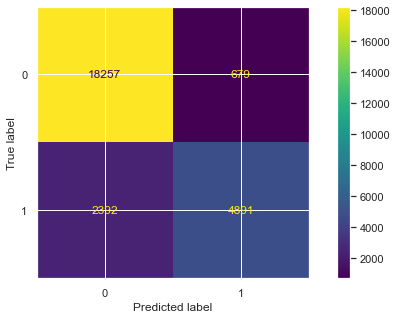

In [332]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     18936
           1       0.88      0.67      0.76      7283

    accuracy                           0.88     26219
   macro avg       0.88      0.82      0.84     26219
weighted avg       0.88      0.88      0.88     26219



In [334]:
# Random Forest Performance Evaluation

In [335]:
# Random Forest model Evaluation metrics
y_pred_rf=rf_1000.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_rf))

Accuracy: 0.8905373965444906
Precision 0.9053830608120522
Recall 0.6766442400109844
f1_score 0.7744774477447743
cohen_kappa_score 0.7041887952184465


In [336]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[18421   515]
 [ 2355  4928]]


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


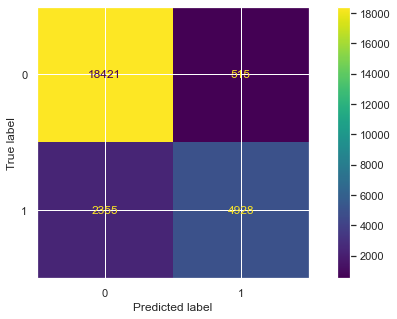

In [337]:
metrics.plot_confusion_matrix(rf_1000,X_test,y_test)

In [338]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18936
           1       0.91      0.68      0.77      7283

    accuracy                           0.89     26219
   macro avg       0.90      0.82      0.85     26219
weighted avg       0.89      0.89      0.89     26219



In [339]:
# Gradient Boosting Machine Performance Evaluation

In [340]:
# Gradient Boosting Machine model Evaluation metrics
y_pred_gbm=gbm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_gbm))

Accuracy: 0.8922918494221748
Precision 0.8930019390093425
Recall 0.6955924756281752
f1_score 0.782031491200988
cohen_kappa_score 0.7119648037956022


In [341]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_gbm)
print(confusion_matrix)

[[18329   607]
 [ 2217  5066]]


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


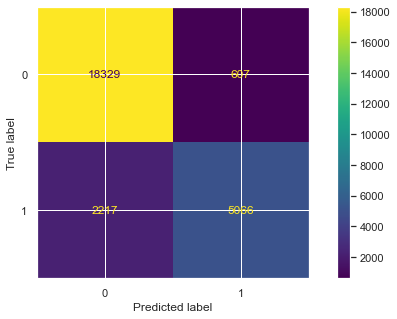

In [342]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [343]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18936
           1       0.89      0.70      0.78      7283

    accuracy                           0.89     26219
   macro avg       0.89      0.83      0.86     26219
weighted avg       0.89      0.89      0.89     26219



In [344]:
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlogreg),metrics.precision_score(y_test, y_predlogreg),metrics.recall_score(y_test, y_predlogreg),metrics.f1_score(y_test,y_predlogreg),metrics.cohen_kappa_score(y_test,y_predlogreg)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_tree),metrics.precision_score(y_test, y_pred_tree),metrics.recall_score(y_test, y_pred_tree),metrics.f1_score(y_test,y_pred_tree),metrics.cohen_kappa_score(y_test,y_pred_tree)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test,y_pred_rf),metrics.precision_score(y_test, y_pred_rf),metrics.recall_score(y_test,y_pred_rf),metrics.f1_score(y_test,y_pred_rf),metrics.cohen_kappa_score(y_test,y_pred_rf)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_gbm),metrics.precision_score(y_test, y_pred_gbm),metrics.recall_score(y_test, y_pred_gbm),metrics.f1_score(y_test,y_pred_gbm),metrics.cohen_kappa_score(y_test,y_pred_gbm)))

Logistic Regression     Accuracy is:0.87,Precision is:0.84,Recall is:0.66,F1 Score is :0.74 and Cohen_kappa_score is :0.66
Decision Tree           Accuracy is:0.88,Precision is:0.88,Recall is:0.67,F1 Score is :0.76 and Cohen_kappa_score is :0.69
Random Forest           Accuracy is:0.89,Precision is:0.91,Recall is:0.68,F1 Score is :0.77 and Cohen_kappa_score is :0.70
GradientBoostingMachine Accuracy is:0.89,Precision is:0.89,Recall is:0.70,F1 Score is :0.78 and Cohen_kappa_score is :0.71


# Prediction From The Model

In [345]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].mean()

P_Rank
0          NaN
1     0.020574
2     0.041601
3     0.058231
4     0.079121
5     0.105234
6     0.139392
7     0.199058
8     0.348549
9     0.730844
10    0.917201
Name: y_pred_P, dtype: float64

In [346]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['y_pred_P_dtree'].mean()

P_Rank_dtree
0          NaN
1     0.026828
2     0.042369
3     0.058061
4     0.086353
5     0.105559
6     0.112188
7     0.205755
8     0.286084
9     0.714523
10    0.976306
Name: y_pred_P_dtree, dtype: float64

In [347]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['y_pred_P_rf'].mean()

P_Rank_rf
0          NaN
1     0.026549
2     0.040554
3     0.054600
4     0.074316
5     0.100306
6     0.131472
7     0.203212
8     0.319680
9     0.710540
10    0.950885
Name: y_pred_P_rf, dtype: float64

In [348]:
y_pred_prob_gbm = gbm.predict_proba(X_var)[:, 1]
df['y_pred_gbm']=pd.DataFrame(y_pred_prob_gbm)
df['P_Rank_gbm']=pd.qcut(df['y_pred_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_gbm')['y_pred_gbm'].mean()

P_Rank_gbm
0          NaN
1     0.025085
2     0.037270
3     0.049579
4     0.064582
5     0.083792
6     0.122230
7     0.193587
8     0.344308
9     0.737086
10    0.969598
Name: y_pred_gbm, dtype: float64

In [349]:
# Show base model

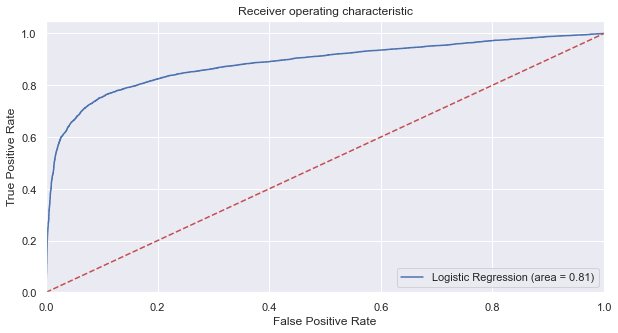

In [350]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))
GBM_roc_auc=roc_auc_score(y_test, gbm.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
# plt.plot(fpr, tpr, label='Random Foreest(area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

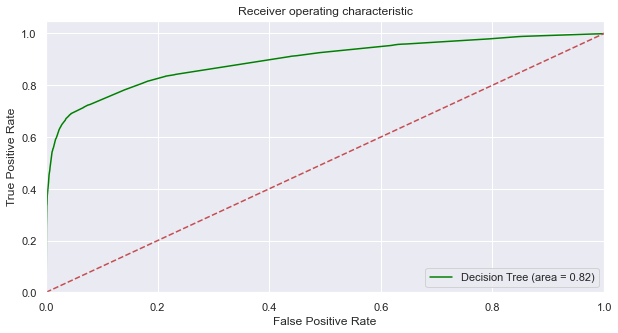

In [351]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

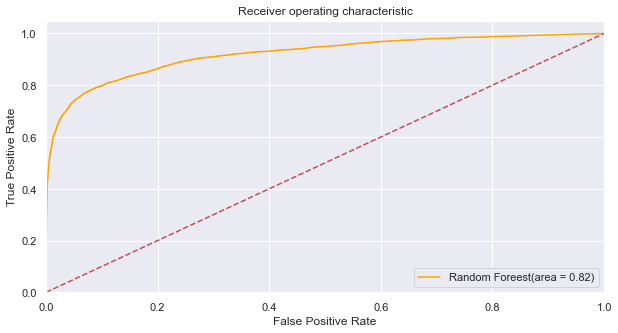

In [352]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
plt.plot(fpr, tpr, label='Random Foreest(area = %0.2f)' % RF_roc_auc,color="orange")
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

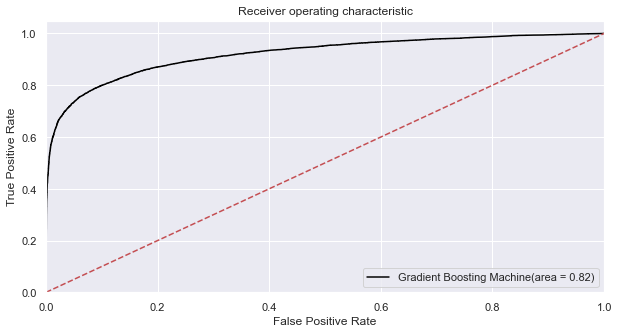

In [353]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBM_ROC')
plt.show()

In [354]:
# model.get_params().keys()

# Checking for Data Imbalance

In [355]:
y_train.value_counts()

0    44435
1    16742
Name: target, dtype: int64

In [356]:
y_train.value_counts()/sum(y_train.value_counts())

0    0.726335
1    0.273665
Name: target, dtype: float64

In [357]:
y_test.value_counts()

0    18936
1     7283
Name: target, dtype: int64

In [358]:
y_test.value_counts()/sum(y_test.value_counts())

0    0.722224
1    0.277776
Name: target, dtype: float64

In [359]:
# We have about lower representation of cancelled class(about 37 percent) compared to not cancelled clas(about 63 percent)
# We find mild data imbalance(20-40%) in train and test data

In [360]:
# We try to handle this mild class imbalance through using class_weight

In [361]:
# Logistic Regression Model Parameters Gridsearchcv
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression(max_iter=3000)
penalty = ['none', 'l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight=['balanced']
# define grid search
grid = dict(penalty=penalty,C=c_values,class_weight=class_weight) # 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-3, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print(grid_result.best_params_)
print(grid_result.best_score_)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

Best: 0.736866 using {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.736470 (0.008042) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'none'}
0.736421 (0.007643) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
0.736470 (0.008042) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'none'}
0.736547 (0.007979) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
0.736470 (0.008042) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'none'}
0.736731 (0.007923) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1'}
0.0

In [362]:
storelp=grid_result.best_params_  #storing the best grid seach params for fast runtimes {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
storels=grid_result.best_score_ # 0.7459092351860768

In [363]:
storelp

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [364]:
# Lets do grid searchCv for decision tree to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
dtcv = DecisionTreeClassifier()
forest_params = [{'max_depth':[10,20,30,50], 'max_features': [10,15,20,25],'min_samples_leaf':[50,100],'class_weight':['balanced']}] # class_weight:'balanced'
clfgsdt = GridSearchCV(dtcv, forest_params, cv = 10, scoring='f1',n_jobs=-7)
clfgsdt.fit(X_train, y_train)
print(clfgsdt.best_params_)
print(clfgsdt.best_score_)

{'class_weight': 'balanced', 'max_depth': 20, 'max_features': 25, 'min_samples_leaf': 50}
0.7496613206668183


In [365]:
storedp=clfgsdt.best_params_ # {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 25, 'min_samples_leaf': 50}
storeds=clfgsdt.best_score_  # 0.7566909911319488

In [366]:
# Lets do grid searchCv to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
rfcgs = RandomForestClassifier(n_jobs=-3)
forest_params = [{'max_depth': [11,15,19,23], 'max_features': [10,15,20,25],'n_estimators':[50,75,100],'min_samples_leaf':[50,100],'class_weight':['balanced']}] # class_weight:'balanced'
clfgs = GridSearchCV(rfcgs, forest_params, cv = 10, scoring='f1')
clfgs.fit(X_train, y_train)
print(clfgs.best_params_)
print(clfgs.best_score_)

{'class_weight': 'balanced', 'max_depth': 19, 'max_features': 20, 'min_samples_leaf': 50, 'n_estimators': 75}
0.7614376173010537


In [367]:
storerp=clfgs.best_params_ # {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
storers=clfgs.best_score_ # 0.7682407328809886


In [368]:
rfcgs.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [369]:
# Lets do grid searchCv to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbmcv = GradientBoostingClassifier()
gbm_params = [{'max_depth': [11,15,19,23], 'max_features': [10,15,20,25],'n_estimators':[50,75,100],'min_samples_leaf':[50,100]}] 
gbmgs = GridSearchCV(gbmcv, gbm_params, cv = 10, scoring='f1',n_jobs=-3)
gbmgs.fit(X_train, y_train)
print(gbmgs.best_params_)
print(gbmgs.best_score_)

{'max_depth': 19, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
0.7835423362035222


In [370]:
storegp=gbmgs.best_params_ # {'max_depth': 19, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
storegs=gbmgs.best_score_ # 0.7891457709389943

In [371]:
# In accordance with the best gridsearch model parameters found above lets finetune our models
lro = LogisticRegression(**storelp)
dto=DecisionTreeClassifier(**storedp)
rfo=RandomForestClassifier(**storerp)
gbmo=GradientBoostingClassifier(**storegp)

In [372]:
# Model Fitting
lro.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced')

In [373]:
dto.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       min_samples_leaf=50)

In [374]:
rfo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=19, max_features=20,
                       min_samples_leaf=50, n_estimators=75)

In [375]:
gbmo.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=19, max_features=25, min_samples_leaf=50)

In [376]:
# Performance evaluation new Logistic Regression Model
y_predlro = lro.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predlro))
print("Precision",metrics.precision_score(y_test,y_predlro))
print("Recall",metrics.recall_score(y_test,y_predlro))
print("f1_score",metrics.f1_score(y_test,y_predlro))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predlro))

Accuracy: 0.8545711125519662
Precision 0.7314567769477054
Recall 0.7528491006453385
f1_score 0.7419987820556194
cohen_kappa_score 0.6407773675726709


In [377]:
# Performance evaluation new Decision Tree Model
y_preddto = dto.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_preddto))
print("Precision",metrics.precision_score(y_test,y_preddto))
print("Recall",metrics.recall_score(y_test,y_preddto))
print("f1_score",metrics.f1_score(y_test,y_preddto))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_preddto))

Accuracy: 0.8586139822266295
Precision 0.7179424670892248
Recall 0.8087326651105313
f1_score 0.760637954413379
cohen_kappa_score 0.6608186628184312


In [378]:
# Performance evaluation new Random Forest Model
y_predrfo = rfo.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predrfo))
print("Precision",metrics.precision_score(y_test,y_predrfo))
print("Recall",metrics.recall_score(y_test,y_predrfo))
print("f1_score",metrics.f1_score(y_test,y_predrfo))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predrfo))

Accuracy: 0.8713909760097639
Precision 0.7566609791311195
Recall 0.791569408210902
f1_score 0.773721648100926
cohen_kappa_score 0.6839516765851192


In [379]:
# Performance evaluation new Gradient Boosting Machine Model
y_predgbmo = gbmo.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predgbmo))
print("Precision",metrics.precision_score(y_test,y_predgbmo))
print("Recall",metrics.recall_score(y_test,y_predgbmo))
print("f1_score",metrics.f1_score(y_test,y_predgbmo))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predgbmo))

Accuracy: 0.8945802662191541
Precision 0.8803231779161758
Recall 0.7181106686804888
f1_score 0.7909860859044162
cohen_kappa_score 0.7214683870169298


In [380]:
# Comparison between before and after hyperparameter tuning

In [381]:
# The score before hyperparameter optimization were
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlogreg),metrics.precision_score(y_test, y_predlogreg),metrics.recall_score(y_test, y_predlogreg),metrics.f1_score(y_test,y_predlogreg),metrics.cohen_kappa_score(y_test,y_predlogreg)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_tree),metrics.precision_score(y_test, y_pred_tree),metrics.recall_score(y_test, y_pred_tree),metrics.f1_score(y_test,y_pred_tree),metrics.cohen_kappa_score(y_test,y_pred_tree)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test,y_pred_rf),metrics.precision_score(y_test, y_pred_rf),metrics.recall_score(y_test,y_pred_rf),metrics.f1_score(y_test,y_pred_rf),metrics.cohen_kappa_score(y_test,y_pred_rf)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_gbm),metrics.precision_score(y_test, y_pred_gbm),metrics.recall_score(y_test, y_pred_gbm),metrics.f1_score(y_test,y_pred_gbm),metrics.cohen_kappa_score(y_test,y_pred_gbm)))

Logistic Regression     Accuracy is:0.87,Precision is:0.84,Recall is:0.66,F1 Score is :0.74 and Cohen_kappa_score is :0.66
Decision Tree           Accuracy is:0.88,Precision is:0.88,Recall is:0.67,F1 Score is :0.76 and Cohen_kappa_score is :0.69
Random Forest           Accuracy is:0.89,Precision is:0.91,Recall is:0.68,F1 Score is :0.77 and Cohen_kappa_score is :0.70
GradientBoostingMachine Accuracy is:0.89,Precision is:0.89,Recall is:0.70,F1 Score is :0.78 and Cohen_kappa_score is :0.71


In [382]:
# The scores after hyperparameter optimization were
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlro),metrics.precision_score(y_test, y_predlro),metrics.recall_score(y_test, y_predlro),metrics.f1_score(y_test,y_predlro),metrics.cohen_kappa_score(y_test,y_predlro)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_preddto),metrics.precision_score(y_test, y_preddto),metrics.recall_score(y_test, y_preddto),metrics.f1_score(y_test,y_preddto),metrics.cohen_kappa_score(y_test,y_preddto)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predrfo),metrics.precision_score(y_test, y_predrfo),metrics.recall_score(y_test,y_predrfo),metrics.f1_score(y_test,y_predrfo),metrics.cohen_kappa_score(y_test,y_predrfo)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predgbmo),metrics.precision_score(y_test, y_predgbmo),metrics.recall_score(y_test, y_predgbmo),metrics.f1_score(y_test,y_predgbmo),metrics.cohen_kappa_score(y_test,y_predgbmo)))

Logistic Regression     Accuracy is:0.85,Precision is:0.73,Recall is:0.75,F1 Score is :0.74 and Cohen_kappa_score is :0.64
Decision Tree           Accuracy is:0.86,Precision is:0.72,Recall is:0.81,F1 Score is :0.76 and Cohen_kappa_score is :0.66
Random Forest           Accuracy is:0.87,Precision is:0.76,Recall is:0.79,F1 Score is :0.77 and Cohen_kappa_score is :0.68
GradientBoostingMachine Accuracy is:0.89,Precision is:0.88,Recall is:0.72,F1 Score is :0.79 and Cohen_kappa_score is :0.72


In [383]:
# Comparing the above we see a performance improvement in most metrics after hyperparameter tuning.

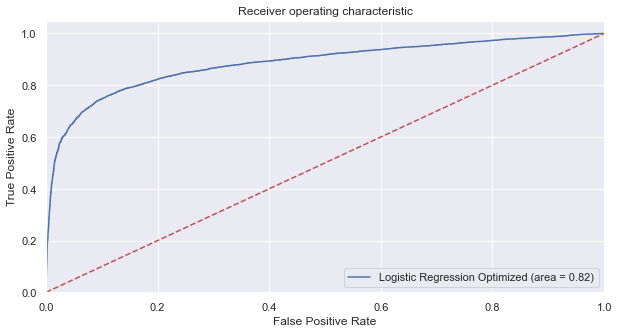

In [384]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lro.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dto.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rfo.predict(X_test))
GBM_roc_auc=roc_auc_score(y_test, gbmo.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lro.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression Optimized (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROCOptimized')
plt.show()

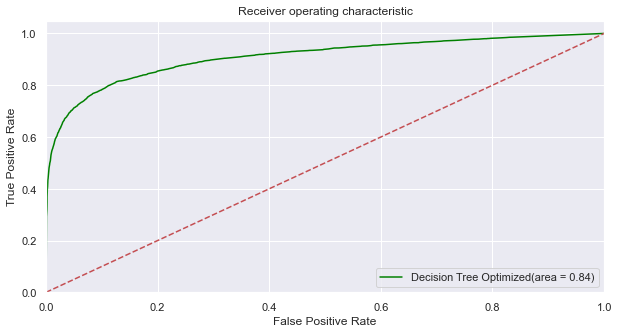

In [385]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, dto.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Decision Tree Optimized(area = %0.2f)' % tree_roc_auc,color="green")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROCOptimized')
plt.show()

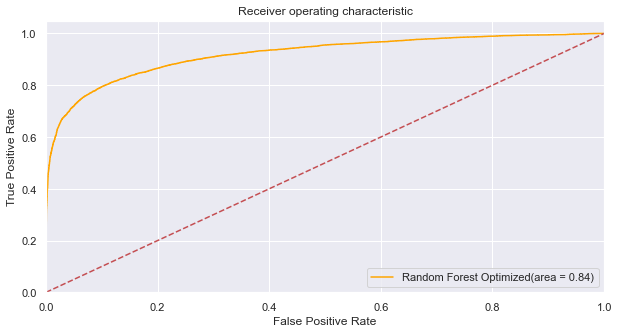

In [386]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, rfo.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Random Forest Optimized(area = %0.2f)' % tree_roc_auc,color="orange")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROCOptimized')
plt.show()

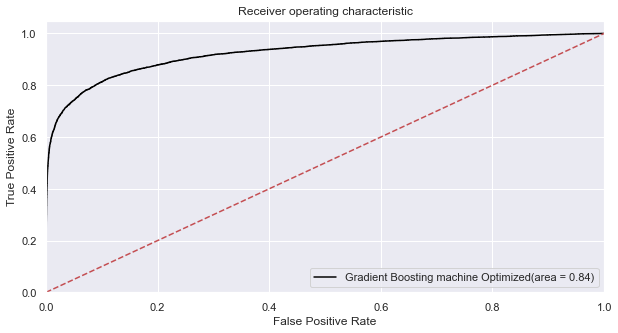

In [387]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, gbmo.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Gradient Boosting machine Optimized(area = %0.2f)' % tree_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBM_ROCOptimized')
plt.show()

In [388]:
# Feature importances
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  feature_importances=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
  print(feature_importances)
  fig.tight_layout()

                                importance
day_wait_ind                      3.566413
prev_cancel_ind                   2.990912
reserved_room_type_E              0.933371
customer_type_Transient           0.752246
reserved_room_type_G              0.646835
reserved_room_type_C              0.591215
market_segment_Groups             0.395669
reserved_room_type_H              0.393047
market_segment_Online TA          0.339791
reserved_room_type_D              0.186268
distribution_channel_TA/TO        0.070423
market_segment_Complementary      0.037342
distribution_channel_Undefined    0.033473
reserved_room_type_P              0.023013
market_segment_Undefined          0.016982
lead_time                         0.006329
reserved_room_type_L              0.006253
adr                               0.003451
market_segment_Corporate          0.001821
customer_type_Group              -0.061325
distribution_channel_GDS         -0.096326
distribution_channel_Direct      -0.108536
reserved_ro

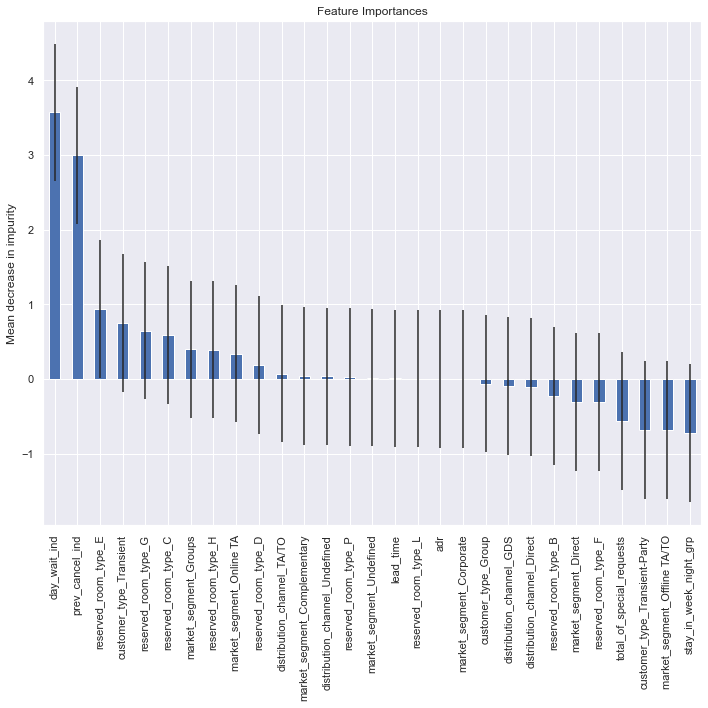

In [389]:
# Feature Importance Logistic Regression Optimized
feature_names = X_train.columns
importances = lro.coef_[0]
std = np.std(importances, axis=0)
model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(10,10))
model_importances.plot.bar(yerr=std, ax=axes)
axes.set_title("Feature Importances")
axes.set_ylabel("Mean decrease in impurity")
feature_importancesl=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
print(feature_importancesl)                                    
fig.tight_layout()

                                importance
day_wait_ind                      0.609172
adr                               0.099828
lead_time                         0.091955
prev_cancel_ind                   0.061517
total_of_special_requests         0.031124
customer_type_Transient           0.025580
market_segment_Offline TA/TO      0.014494
customer_type_Transient-Party     0.011115
market_segment_Corporate          0.010152
distribution_channel_TA/TO        0.008444
reserved_room_type_E              0.006837
market_segment_Online TA          0.006231
reserved_room_type_F              0.005323
reserved_room_type_G              0.004970
reserved_room_type_D              0.003479
reserved_room_type_C              0.002698
distribution_channel_Direct       0.002401
reserved_room_type_H              0.002257
market_segment_Groups             0.001626
market_segment_Direct             0.000795
market_segment_Complementary      0.000003
reserved_room_type_L              0.000000
reserved_ro

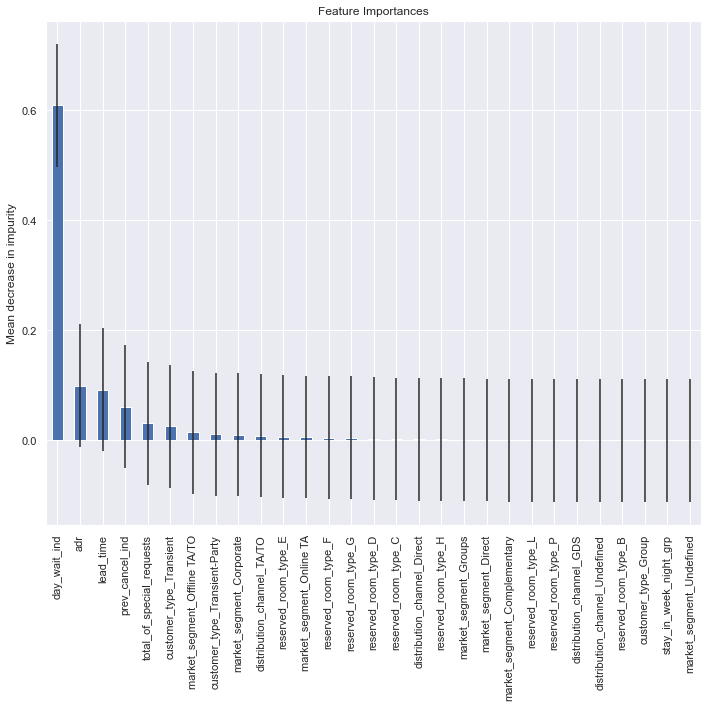

In [390]:
# Feature Importance Decision Tree Optimized

# Feature importances
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std(importances, axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  feature_importances=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
  print(feature_importances)
  fig.tight_layout()
Model_importances(dto,X_train)

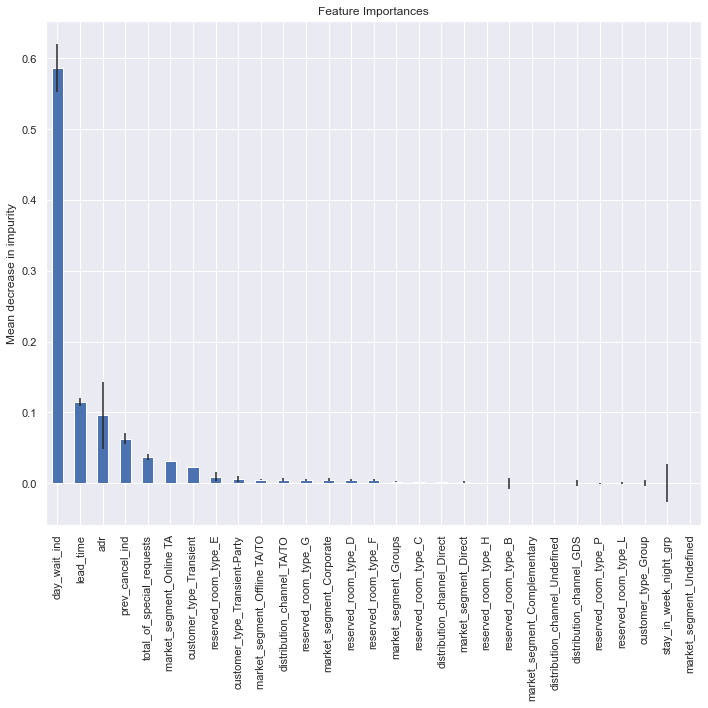

In [391]:
# Feature Importances Random Forest Optimized 
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
Model_importances(rfo,X_train)

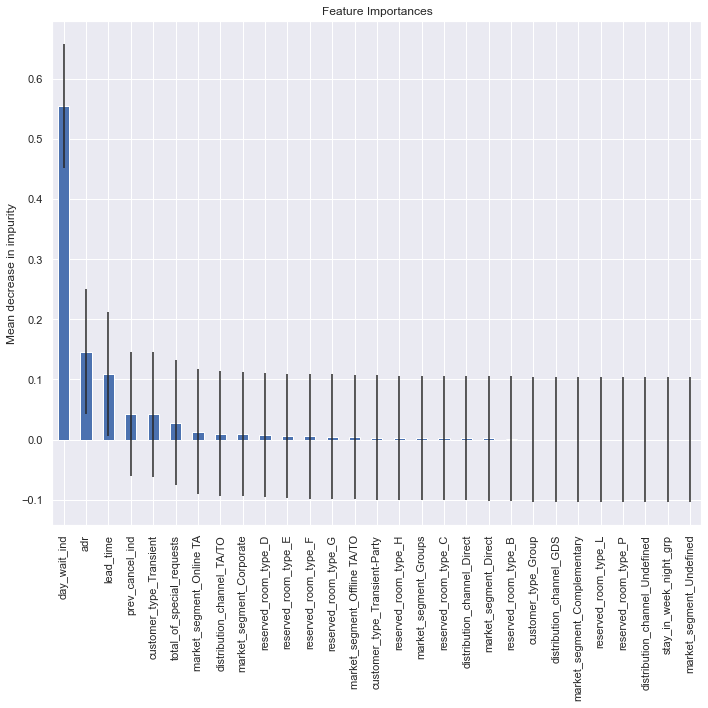

In [392]:
# Feature Importances Gradient boosting Machine Optimized 
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std(gbmo.feature_importances_, axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
Model_importances(gbmo,X_train)

# Predictions from the models

In [393]:
# Here we will rank all my data points in quantiles on the basis of cancellation probability.Each quantile has same no of datapoints.Thus we get an idea of the 
# cancellation chance from the ranks assigned to the datapoints and thus we may take special actions to counter cancellation.For example special discounts,offers 
# and promotions,automatic room upgrade,local travel package discounts,food coupons etc.Overall these actions can bring down cancellation rates and thus boost revenue 
# for the hotel under consideration

In [394]:
y_pred_prob = lro.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].min()

P_Rank
0          NaN
1     0.005974
2     0.092842
3     0.134480
4     0.174482
5     0.214471
6     0.269000
7     0.340981
8     0.459676
9     0.728574
10    0.938808
Name: y_pred_P, dtype: float64

In [395]:
y_pred_prob_dtree = dto.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['y_pred_P_dtree'].min()

P_Rank_dtree
0          NaN
1     0.000000
2     0.000000
3     0.054927
4     0.108534
5     0.164299
6     0.246018
7     0.343947
8     0.507911
9     0.736674
10    0.973793
Name: y_pred_P_dtree, dtype: float64

In [396]:
y_pred_prob_rf = rfo.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['y_pred_P_rf'].min()

P_Rank_rf
0          NaN
1     0.000629
2     0.059790
3     0.095552
4     0.129996
5     0.173702
6     0.237097
7     0.329699
8     0.473964
9     0.701363
10    0.957407
Name: y_pred_P_rf, dtype: float64

In [397]:
y_pred_prob_gbm = gbmo.predict_proba(X_var)[:, 1]
df['y_pred_P_gbm']=pd.DataFrame(y_pred_prob_gbm)
df['P_Rank_gbm']=pd.qcut(df['y_pred_P_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_gbm')['y_pred_P_gbm'].min()

P_Rank_gbm
0          NaN
1     0.000995
2     0.014632
3     0.025026
4     0.037274
5     0.054545
6     0.082180
7     0.140223
8     0.259971
9     0.540430
10    0.959394
Name: y_pred_P_gbm, dtype: float64

In [399]:
df.head()
df.to_csv('hotel_demand_prediction_scored_file.csv')

In [400]:
# Through the above data analysis hotel companys may acually form startegy and planning for lowering cancellation rates which in the long run will boost revenue and thus benefit the business.